<a href="https://colab.research.google.com/github/Quantyca/demo-ateam-ai-misc/blob/master/image-processing/chepizzah_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Setup environment**

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
#!pip install dataclasses

In [0]:
#@title
from fastai import *
from fastai.vision import *

In [0]:
_=download_url('https://storage.googleapis.com/ml_quantyca_it/pietro/chepizzai/data/pizzas.zip','./pizzas.zip',overwrite=True)

In [0]:
import zipfile
with zipfile.ZipFile('pizzas.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [0]:
data_dir = 'data/'

# **Verify Data**

In [0]:
classi = [f.path.split('/')[-1] for f in os.scandir(data_dir) if f.is_dir() ]    
for c in classi:
  print(c)
  verify_images(Path(data_dir)/c, delete=True)

In [0]:
#rimozione immagine errata presente nel dataset, in attesa di rifare l'upload dello zip
#import os
#os.remove("data/diavola/diavola__0076.jpg")

FileNotFoundError: ignored

# **View Data**

In [0]:
np.random.seed(42)
bs = 32
data = ImageDataBunch.from_folder(Path(data_dir), train=".", valid_pct=0.2, 
                                  ds_tfms=get_transforms(max_rotate=45, max_zoom=1),
                                  size=224, bs=bs).normalize(imagenet_stats)

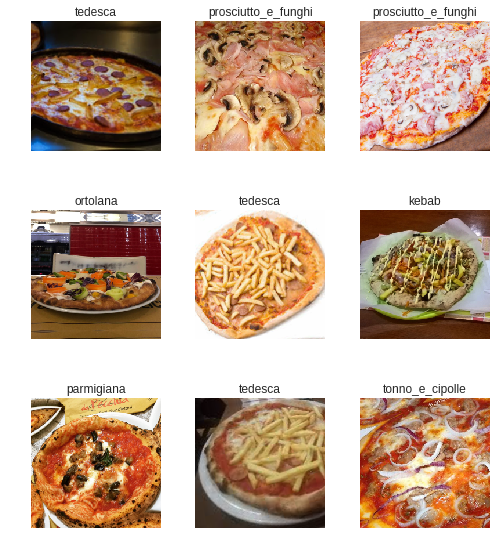

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['capricciosa',
  'crudo_rucola_grana',
  'diavola',
  'frutti_di_mare',
  'kebab',
  'margherita',
  'marinara',
  'ortolana',
  'parmigiana',
  'prosciutto',
  'prosciutto_e_funghi',
  'quattro_formaggi',
  'salsiccia_e_friarelli',
  'tedesca',
  'tonno_e_cipolle'],
 15,
 1108,
 276)

# **Train Model with Resnet34**

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,2.695811,1.413917,0.394928
2,1.811471,0.880007,0.289855
3,1.293468,0.739450,0.246377
4,1.023698,0.722928,0.235507


In [0]:
learn.save('res34-stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


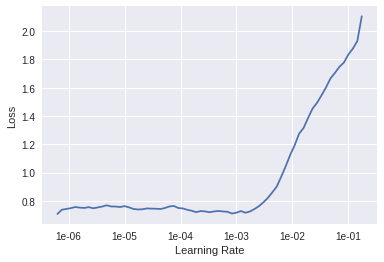

In [0]:
learn.load('res34-stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.load('res34-stage-1')
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=1e-4)

epoch,train_loss,valid_loss,error_rate
1,0.730764,0.521776,0.155797
2,0.591158,0.427000,0.152174
3,0.438916,0.375701,0.119565
4,0.335898,0.342100,0.101449


In [0]:
learn.save('res34-stage-2')

# **Interpretation**

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

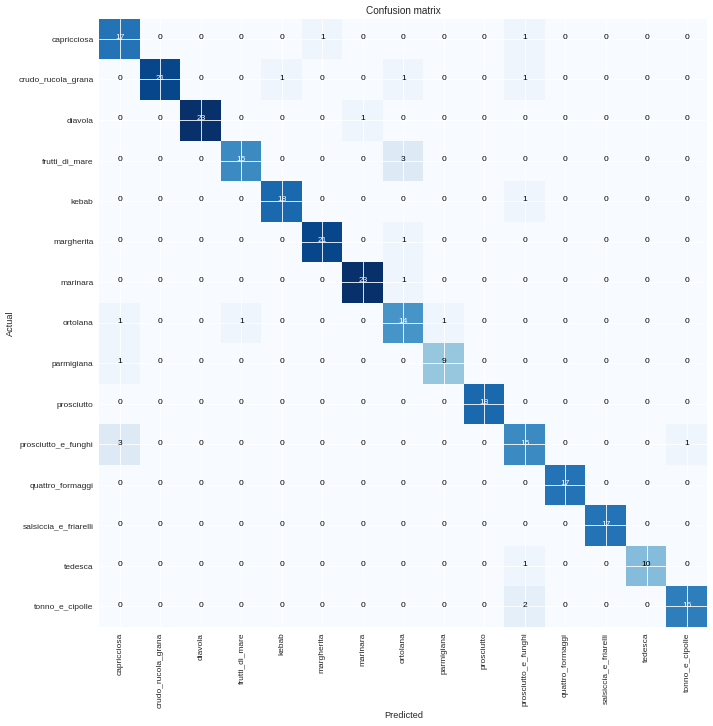

In [0]:
 interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=1)

[('capricciosa', 'prosciutto_e_funghi', 3),
 ('prosciutto_e_funghi', 'capricciosa', 3),
 ('crudo_rucola_grana', 'ortolana', 2),
 ('frutti_di_mare', 'ortolana', 2),
 ('ortolana', 'capricciosa', 2),
 ('ortolana', 'parmigiana', 2),
 ('tonno_e_cipolle', 'prosciutto_e_funghi', 2)]

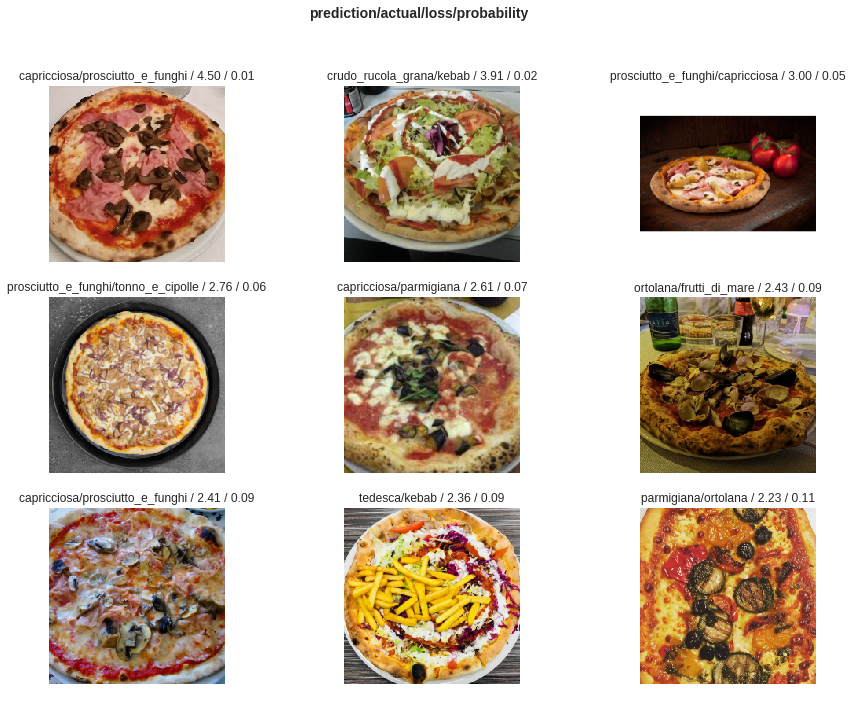

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

# **Train Model with Resnet50**

In [0]:
np.random.seed(42)
bs = 32
data2 = ImageDataBunch.from_folder(Path(data_dir), train=".", valid_pct=0.2, 
                                  ds_tfms=get_transforms(do_flip=True, max_rotate=45, max_zoom=1),
                                  size=224, bs=bs).normalize(imagenet_stats)
learn2 = create_cnn(data2, models.resnet50, metrics=error_rate)
learn2.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,2.025485,0.914357,0.297101
2,1.301450,0.668973,0.213768
3,0.915299,0.552359,0.188406
4,0.706845,0.544103,0.181159


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


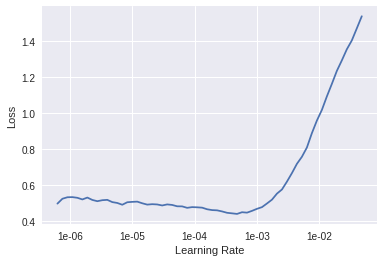

In [0]:
learn2.save('res50-stage-1')
learn2.unfreeze()
learn2.lr_find()
learn2.recorder.plot()

In [0]:
learn2.load('res50-stage-1')
learn2.unfreeze()
learn2.fit_one_cycle(4, max_lr=1e-4)

epoch,train_loss,valid_loss,error_rate
1,0.478995,0.411684,0.141304
2,0.379807,0.347458,0.123188
3,0.275354,0.315817,0.123188
4,0.208133,0.302957,0.115942


In [0]:
learn2.save('res50-stage-2')

# Interpretation Resnet50

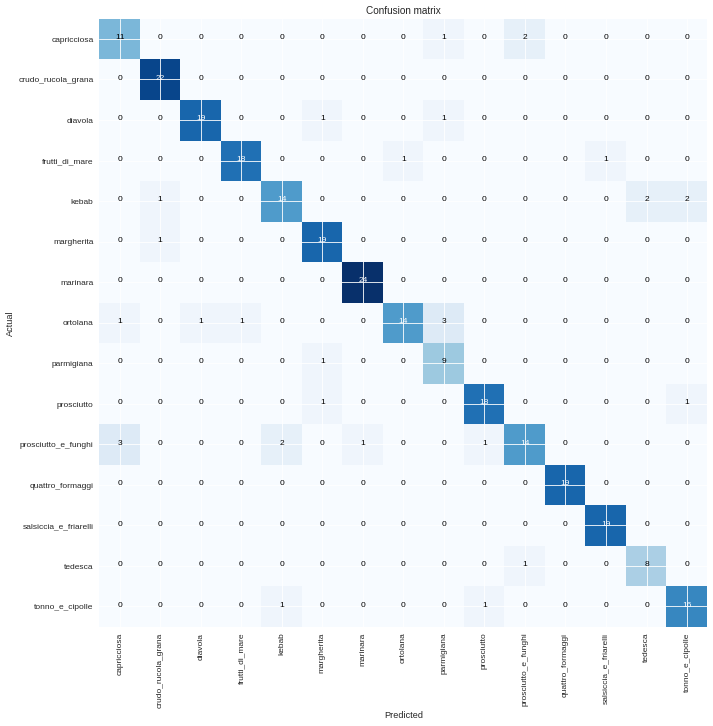

In [0]:
interp2 = ClassificationInterpretation.from_learner(learn2)
interp2.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp2.most_confused(min_val=1)

[('ortolana', 'parmigiana', 3),
 ('prosciutto_e_funghi', 'capricciosa', 3),
 ('capricciosa', 'prosciutto_e_funghi', 2),
 ('kebab', 'tedesca', 2),
 ('kebab', 'tonno_e_cipolle', 2),
 ('prosciutto_e_funghi', 'kebab', 2)]

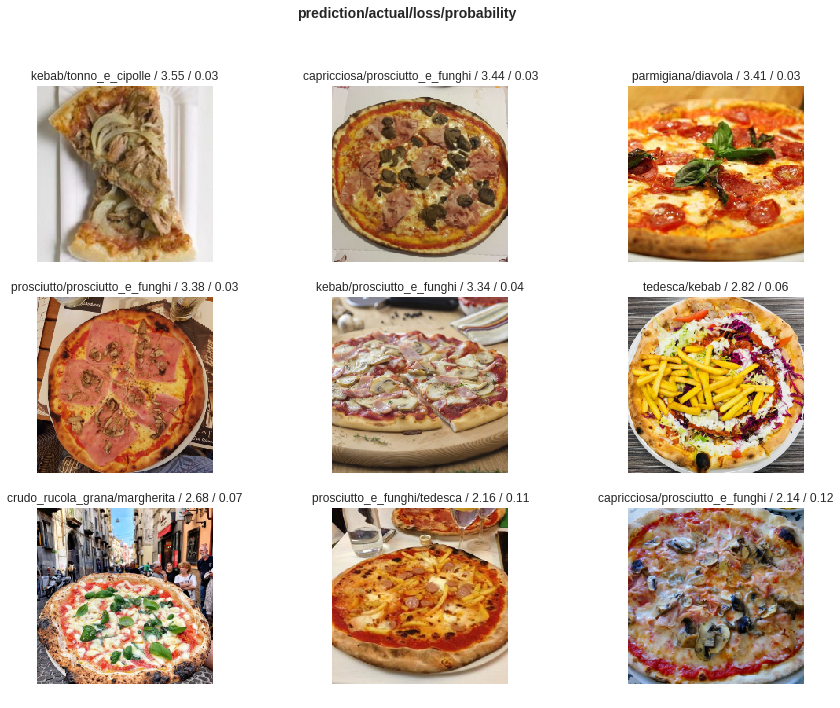

In [0]:
interp2.plot_top_losses(9, figsize=(15,11))